In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from IPython.display import HTML
import numpy as np

import astropy.units as u
from astropy.coordinates import SkyCoord, AltAz, EarthLocation
from astropy.time import Time

In [2]:
# object properties
ra, dec = (16,2,4.2611), (-11,17,17.3869)
objectname = 'FRB121102'

# observation parameters
lat, long = 3.1390, 101.6869 # Kuala Lumpur
height = 100 # observation height in m
date = '2021-08-12'
t1 = Time('%s 00:00:00' % date)
t2 = Time('%s 00:01:00' % date)
tobs = Time('%s 22:19:00' % date)

In [3]:
obj = SkyCoord(frame='fk5', ra='%dh%dm%fs' % ra, dec='%dd%dm%fs' % dec)
loc = EarthLocation(lat=lat, lon=long, height=height*u.m)

In [4]:
coords = lat, long
if coords[0] > 0:
    coords = coords[0], 'N', coords[1]
else:
    coords = abs(coords[0]), 'S', coords[1]
if coords[2] > 0:
    coords = coords[0], coords[1], coords[2], 'E'
else:
    coords = coords[0], coords[1], abs(coords[2]), 'W'
coords = str(coords[0])+'$^{\circ}$ '+coords[1]+', '+str(coords[2])+'$^{\circ}$ '+coords[3]

In [5]:
tplot = t1+np.arange(0,24*60)*(t2-t1)
aa_plt = obj.transform_to(AltAz(location=loc,obstime=tplot))

In [6]:
for x, y in zip(aa_plt.alt, aa_plt.alt[1:]):
    if (x > 0) & (y < 0): #setting time
        setting = aa_plt[aa_plt.alt==x].obstime.iso[0].split(' ')[1]
    if (x < 0) & (y > 0): #rising time
        rising = aa_plt[aa_plt.alt==x].obstime.iso[0].split(' ')[1]
current = tobs.iso.split(' ')[1]

In [7]:
def animate(t):
    point.set_data(np.deg2rad(aa_plt[aa_plt.obstime==t].az),
                   aa_plt[aa_plt.obstime==t].alt)
    current.set_text('Current time: %s' % t.iso.split(' ')[1])
    ax.title.set_text('SkyPlot (%s)\n%s\n%s\n' % (tobs.iso.split(' ')[0],
                                                  objectname,coords))
    return point, 

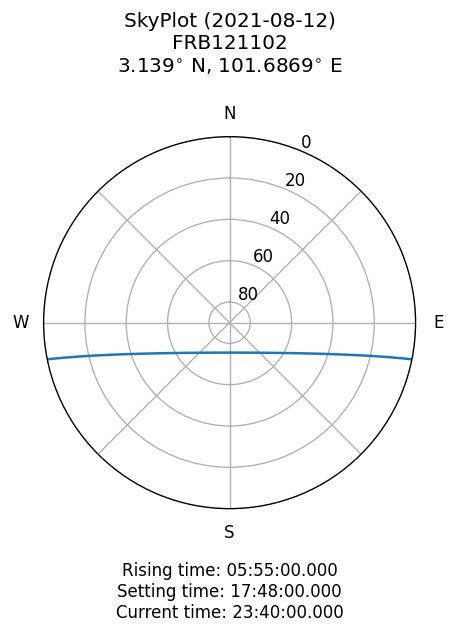

In [8]:
fig = plt.figure(figsize=(4,6),dpi=120)
fig.tight_layout()
ax = fig.add_subplot(projection='polar')
ax.title.set_text('SkyPlot (%s)\n%s\n%s\n' % (tobs.iso.split(' ')[0],
                                              objectname,coords))
ax.plot(np.deg2rad(aa_plt.az),aa_plt.alt)
point, = ax.plot(np.deg2rad(aa_plt.az[aa_plt.obstime==tobs]),
                aa_plt.alt[aa_plt.obstime==tobs],'xr')
ax.set_theta_zero_location('N')
ax.set_xticks(np.deg2rad([0,45,90,135,180,225,270,315]))
ax.set_xticklabels(['N', '', 'E', '', 'S', '', 'W', ''])
ax.set_theta_direction(-1)
ax.set_rlim(bottom=90, top=0)
ax.set_yticks(np.arange(0,90,20))
ax.set_yticklabels(ax.get_yticks()[::1])
ax.text(np.pi,-30,'Rising time: %s' % rising,ha='center', va='center')
ax.text(np.pi,-40,'Setting time: %s' % setting,ha='center', va='center')
current = ax.text(np.pi,-50,'Current time: %s' % tobs.iso.split(' ')[1],
                  ha='center', va='center')

ani = animation.FuncAnimation(fig,animate,interval=50,blit=True,repeat=True,
                    frames=tplot[::20])
HTML(ani.to_html5_video())